In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas al imprimir un DataFrame
pd.set_option('display.float_format', lambda x : '%.4f' % x)  # Formatear números con 4 decimales
import sys
sys.path.append('../')
from SRC import sp_visualizacion as sv
from SRC import sp_eda as seda
from SRC import sp_nulos_num as snulos
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv('../Data/data_limpios.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,latitude,longitude,id_,date_dt,year,month,day,quarter
0,NaN,housemaid,married,basic.4y,0.0000,0.0000,0.0000,telephone,261,1,999,0,nonexistent,"1,1","93,994","-36,4","4,857",5191,no,"41,495","-71,233",089b39d8-e4d0-461b-87d4-814d71e0e079,2019-08-02,2019.0000,8.0000,friday,3.0000
1,57.0000,services,married,high.school,NaN,0.0000,0.0000,telephone,149,1,999,0,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"34,601","-83,923",e9d37224-cb6f-4942-98d7-46672963d097,2016-09-14,2016.0000,9.0000,wednesday,3.0000
2,37.0000,services,married,high.school,0.0000,1.0000,0.0000,telephone,226,1,999,0,nonexistent,"1,1","93,994","-36,4","4,857",5191,no,"34,939","-94,847",3f9f49b5-e410-4948-bf6e-f9244f04918b,2019-02-15,2019.0000,2.0000,friday,1.0000
3,40.0000,admin.,married,basic.6y,0.0000,0.0000,0.0000,telephone,151,1,999,0,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"49,041","-70,308",9991fafb-4447-451a-8be2-b0df6098d13e,2015-11-29,2015.0000,11.0000,sunday,4.0000
4,56.0000,services,married,high.school,0.0000,0.0000,1.0000,telephone,307,1,999,0,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"38,033","-104,463",eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017-01-29,2017.0000,1.0000,sunday,1.0000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
default,34019.0000,0.0001,0.0094,0.0000,0.0000,0.0000,0.0000,1.0000
housing,41974.0000,0.5360,0.4987,0.0000,0.0000,1.0000,1.0000,1.0000
loan,41974.0000,0.1556,0.3625,0.0000,0.0000,0.0000,0.0000,1.0000
duration,43000.0000,257.7393,258.6660,0.0000,102.0000,179.0000,319.0000,4918.0000
campaign,43000.0000,2.5672,2.7723,1.0000,1.0000,2.0000,3.0000,56.0000
pdays,43000.0000,962.3310,187.2604,0.0000,999.0000,999.0000,999.0000,999.0000
previous,43000.0000,0.1740,0.4974,0.0000,0.0000,0.0000,0.0000,7.0000
year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000


In [5]:
columnas_num = df.select_dtypes(include=np.number).columns.tolist()
lista_eliminar = ('year', 'month', 'quarter')
for col in lista_eliminar:
   columnas_num.remove(col) 


In [6]:
df[columnas_num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
default,34019.0000,0.0001,0.0094,0.0000,0.0000,0.0000,0.0000,1.0000
housing,41974.0000,0.5360,0.4987,0.0000,0.0000,1.0000,1.0000,1.0000
loan,41974.0000,0.1556,0.3625,0.0000,0.0000,0.0000,0.0000,1.0000
duration,43000.0000,257.7393,258.6660,0.0000,102.0000,179.0000,319.0000,4918.0000
campaign,43000.0000,2.5672,2.7723,1.0000,1.0000,2.0000,3.0000,56.0000
pdays,43000.0000,962.3310,187.2604,0.0000,999.0000,999.0000,999.0000,999.0000
previous,43000.0000,0.1740,0.4974,0.0000,0.0000,0.0000,0.0000,7.0000


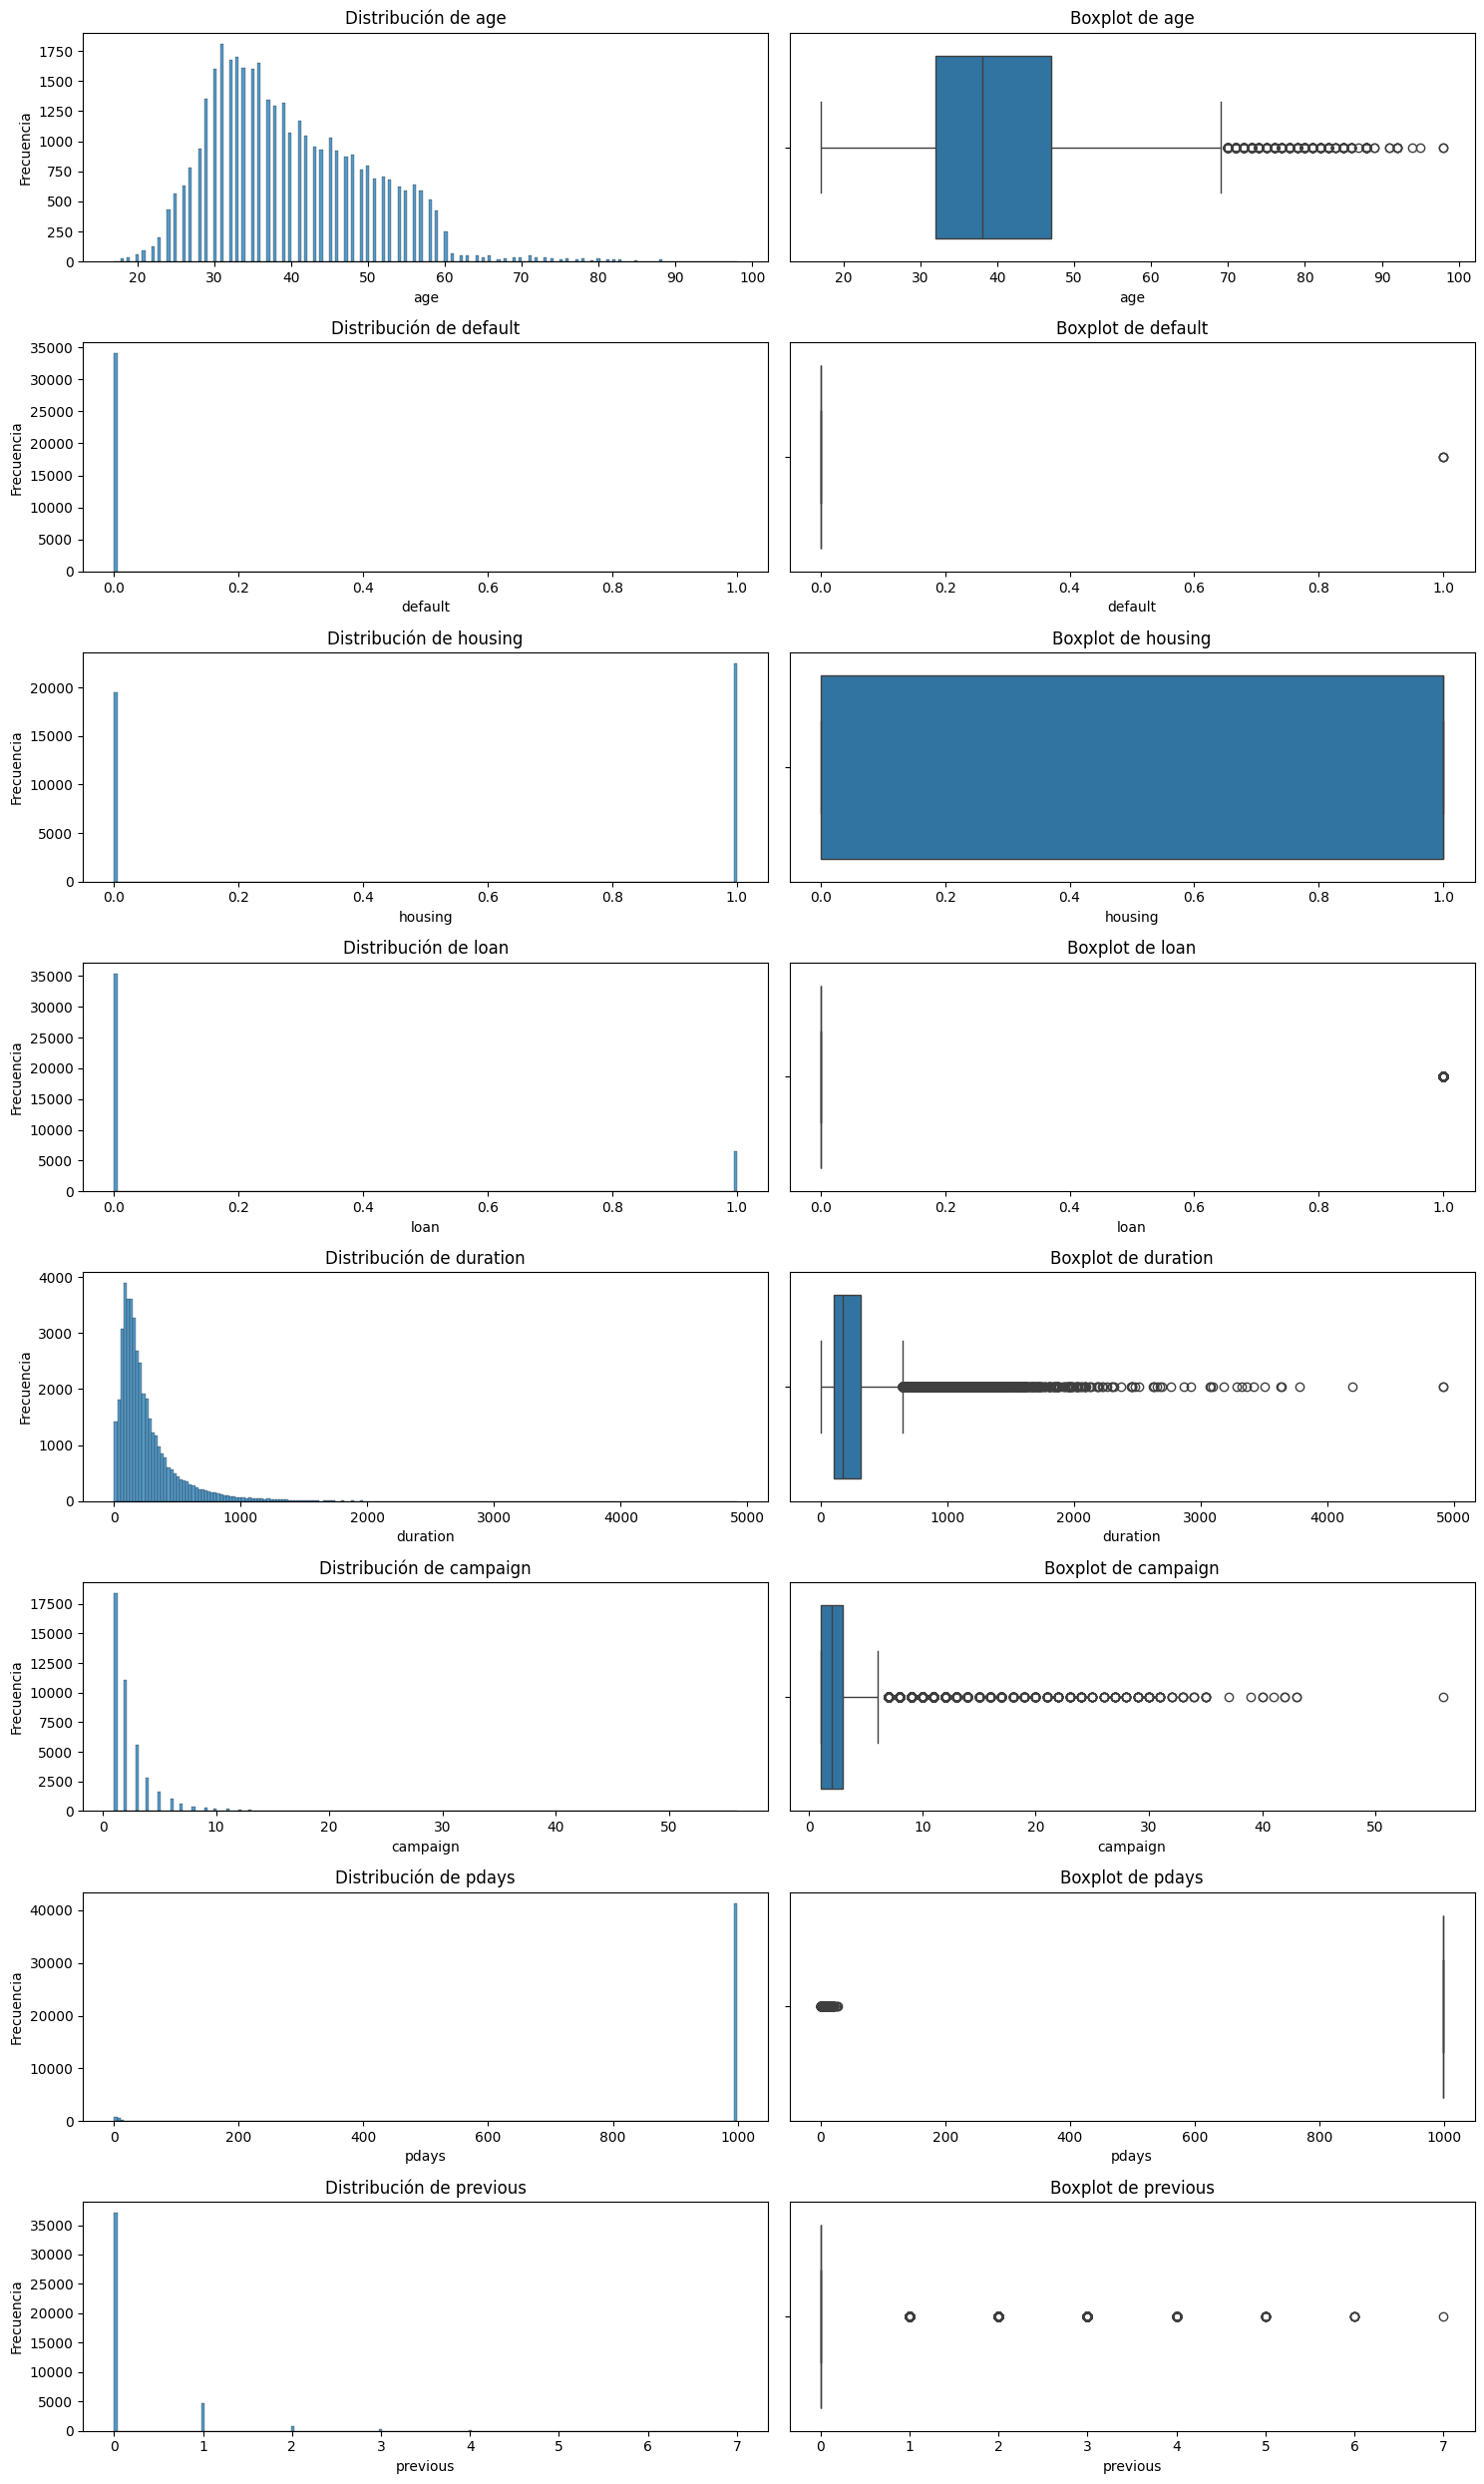

In [7]:
sv.subplot_col_num(df, columnas_num)

In [8]:
df['pdays'][df['pdays']<200].count()

np.int64(1588)

In [9]:
dicc_outliers = {'default': 0.8,
                 'loan': 0.8,
                 'duration': 2500,
                 'campaign': 20,
                 'previous': 3}

In [10]:
for col, out in dicc_outliers.items():
    outliers = df[col][df[col]> out].count()
    print(f'Para la columna {col.upper()} tenemos {outliers} outliers, lo que representa un {round(outliers/df.shape[0]*100,3)}% de los datos')

Para la columna DEFAULT tenemos 3 outliers, lo que representa un 0.007% de los datos
Para la columna LOAN tenemos 6532 outliers, lo que representa un 15.191% de los datos
Para la columna DURATION tenemos 25 outliers, lo que representa un 0.058% de los datos
Para la columna CAMPAIGN tenemos 170 outliers, lo que representa un 0.395% de los datos
Para la columna PREVIOUS tenemos 101 outliers, lo que representa un 0.235% de los datos


In [11]:
df['default'] = df['default'].apply(lambda x : np.nan if x > 0.8 else x)
df['duration'] = df['duration'].apply(lambda x : np.nan if x > 2500 else x)
df['campaign'] = df['campaign'].apply(lambda x : np.nan if x > 20 else x)
df['previous'] = df['previous'].apply(lambda x : np.nan if x > 3 else x)
df['pdays'] = df['pdays'].apply(lambda x : np.nan if x < 200 else x)

## Analizamos las columnas numéricas relacionadas con fecha

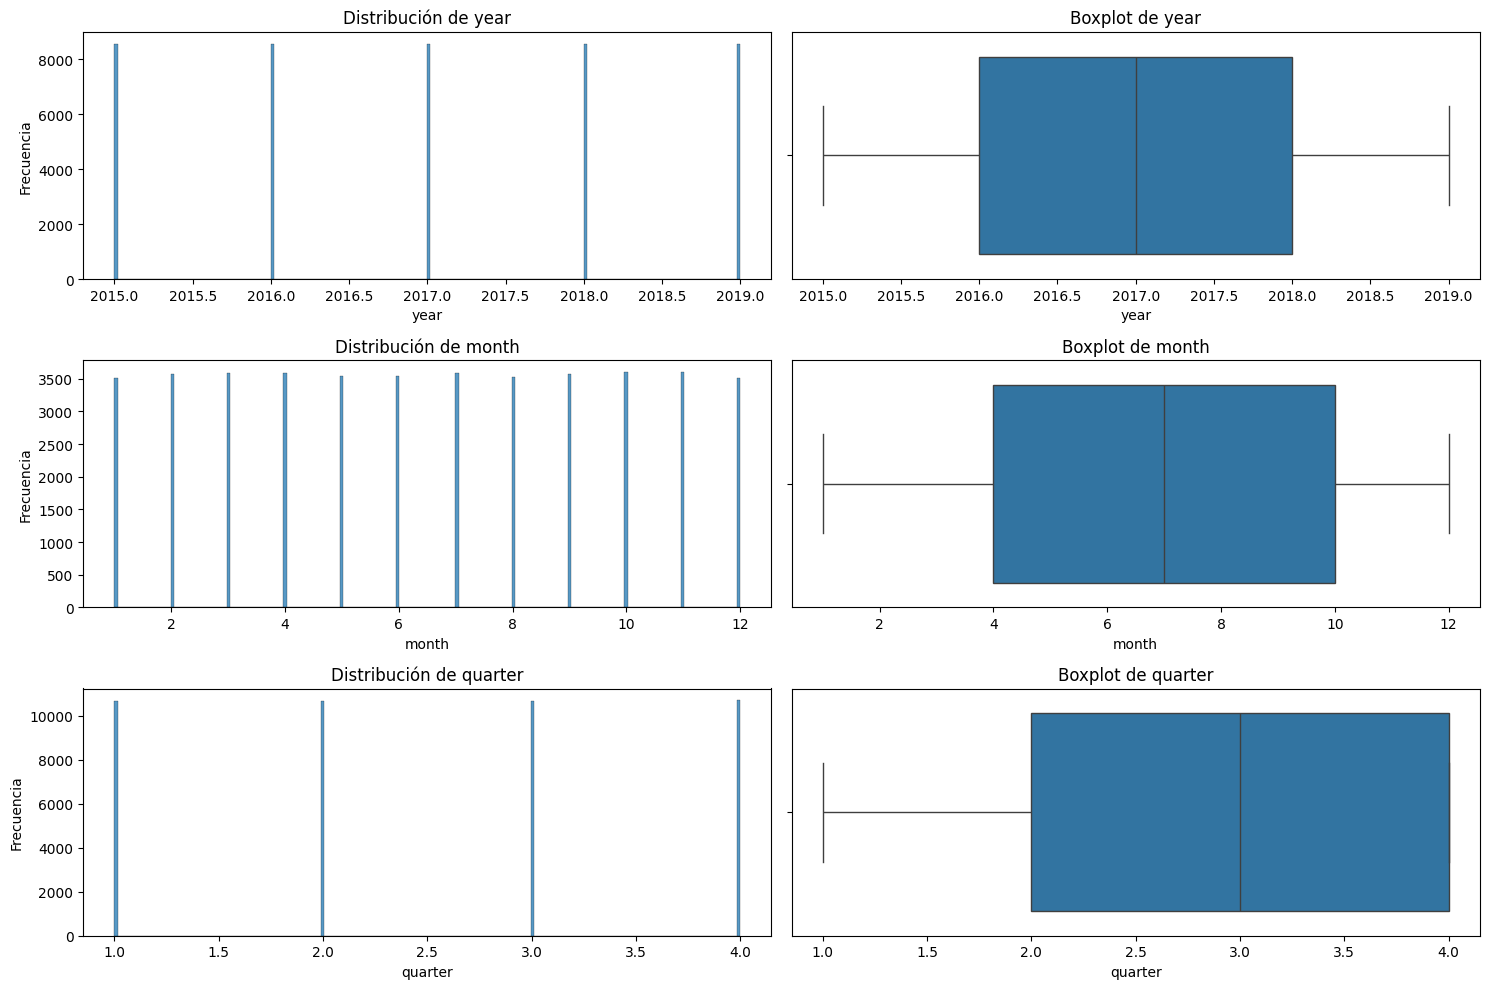

In [12]:
lista_columnas_fecha = ['year', 'month', 'quarter']
sv.subplot_col_num(df, lista_columnas_fecha)

In [13]:
df[lista_columnas_fecha].describe().T

,count,mean,std,min,25%,50%,75%,max
year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000
quarter,42752.0000,2.5013,1.1185,1.0000,2.0000,3.0000,4.0000,4.0000


# Gestion nulos de las columnas numéricas

In [14]:
total_nulos, porcentaje_total_nulos = seda.calcular_nulos(df)


In [15]:
total_nulos 

age               5120
job                  0
marital              0
education            0
default           8984
housing           1026
loan              1026
contact              0
duration            25
campaign           170
pdays             1588
previous           101
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
latitude             0
longitude            0
id_                  0
date_dt              0
year               248
month              248
day                  0
quarter            248
dtype: int64

In [16]:
porcentaje_total_nulos 

age              11.9070
job               0.0000
marital           0.0000
education         0.0000
default          20.8930
housing           2.3860
loan              2.3860
contact           0.0000
duration          0.0581
campaign          0.3953
pdays             3.6930
previous          0.2349
poutcome          0.0000
emp_var_rate      0.0000
cons_price_idx    0.0000
cons_conf_idx     0.0000
euribor3m         0.0000
nr_employed       0.0000
y                 0.0000
latitude          0.0000
longitude         0.0000
id_               0.0000
date_dt           0.0000
year              0.5767
month             0.5767
day               0.0000
quarter           0.5767
dtype: float64

In [17]:
col_high_umbral, col_low_umbral = snulos.calcular_solo_col_nul(df)

,Column,DataType,NullCount,Null%
0,age,float64,5120,11.9070
1,default,float64,8984,20.8930
2,housing,float64,1026,2.3860
3,loan,float64,1026,2.3860
4,duration,float64,25,0.0581
5,campaign,float64,170,0.3953
6,pdays,float64,1588,3.6930
7,previous,float64,101,0.2349
8,year,float64,248,0.5767
9,month,float64,248,0.5767


In [18]:
col_low_umbral

['housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'year',
 'month',
 'quarter']

## Empezamos a gestionar nulos: columnas con un % de nulos inferior al umbral
- El umbral estabelcido es 10%
- El método para imputar nulos va a ser fillna()

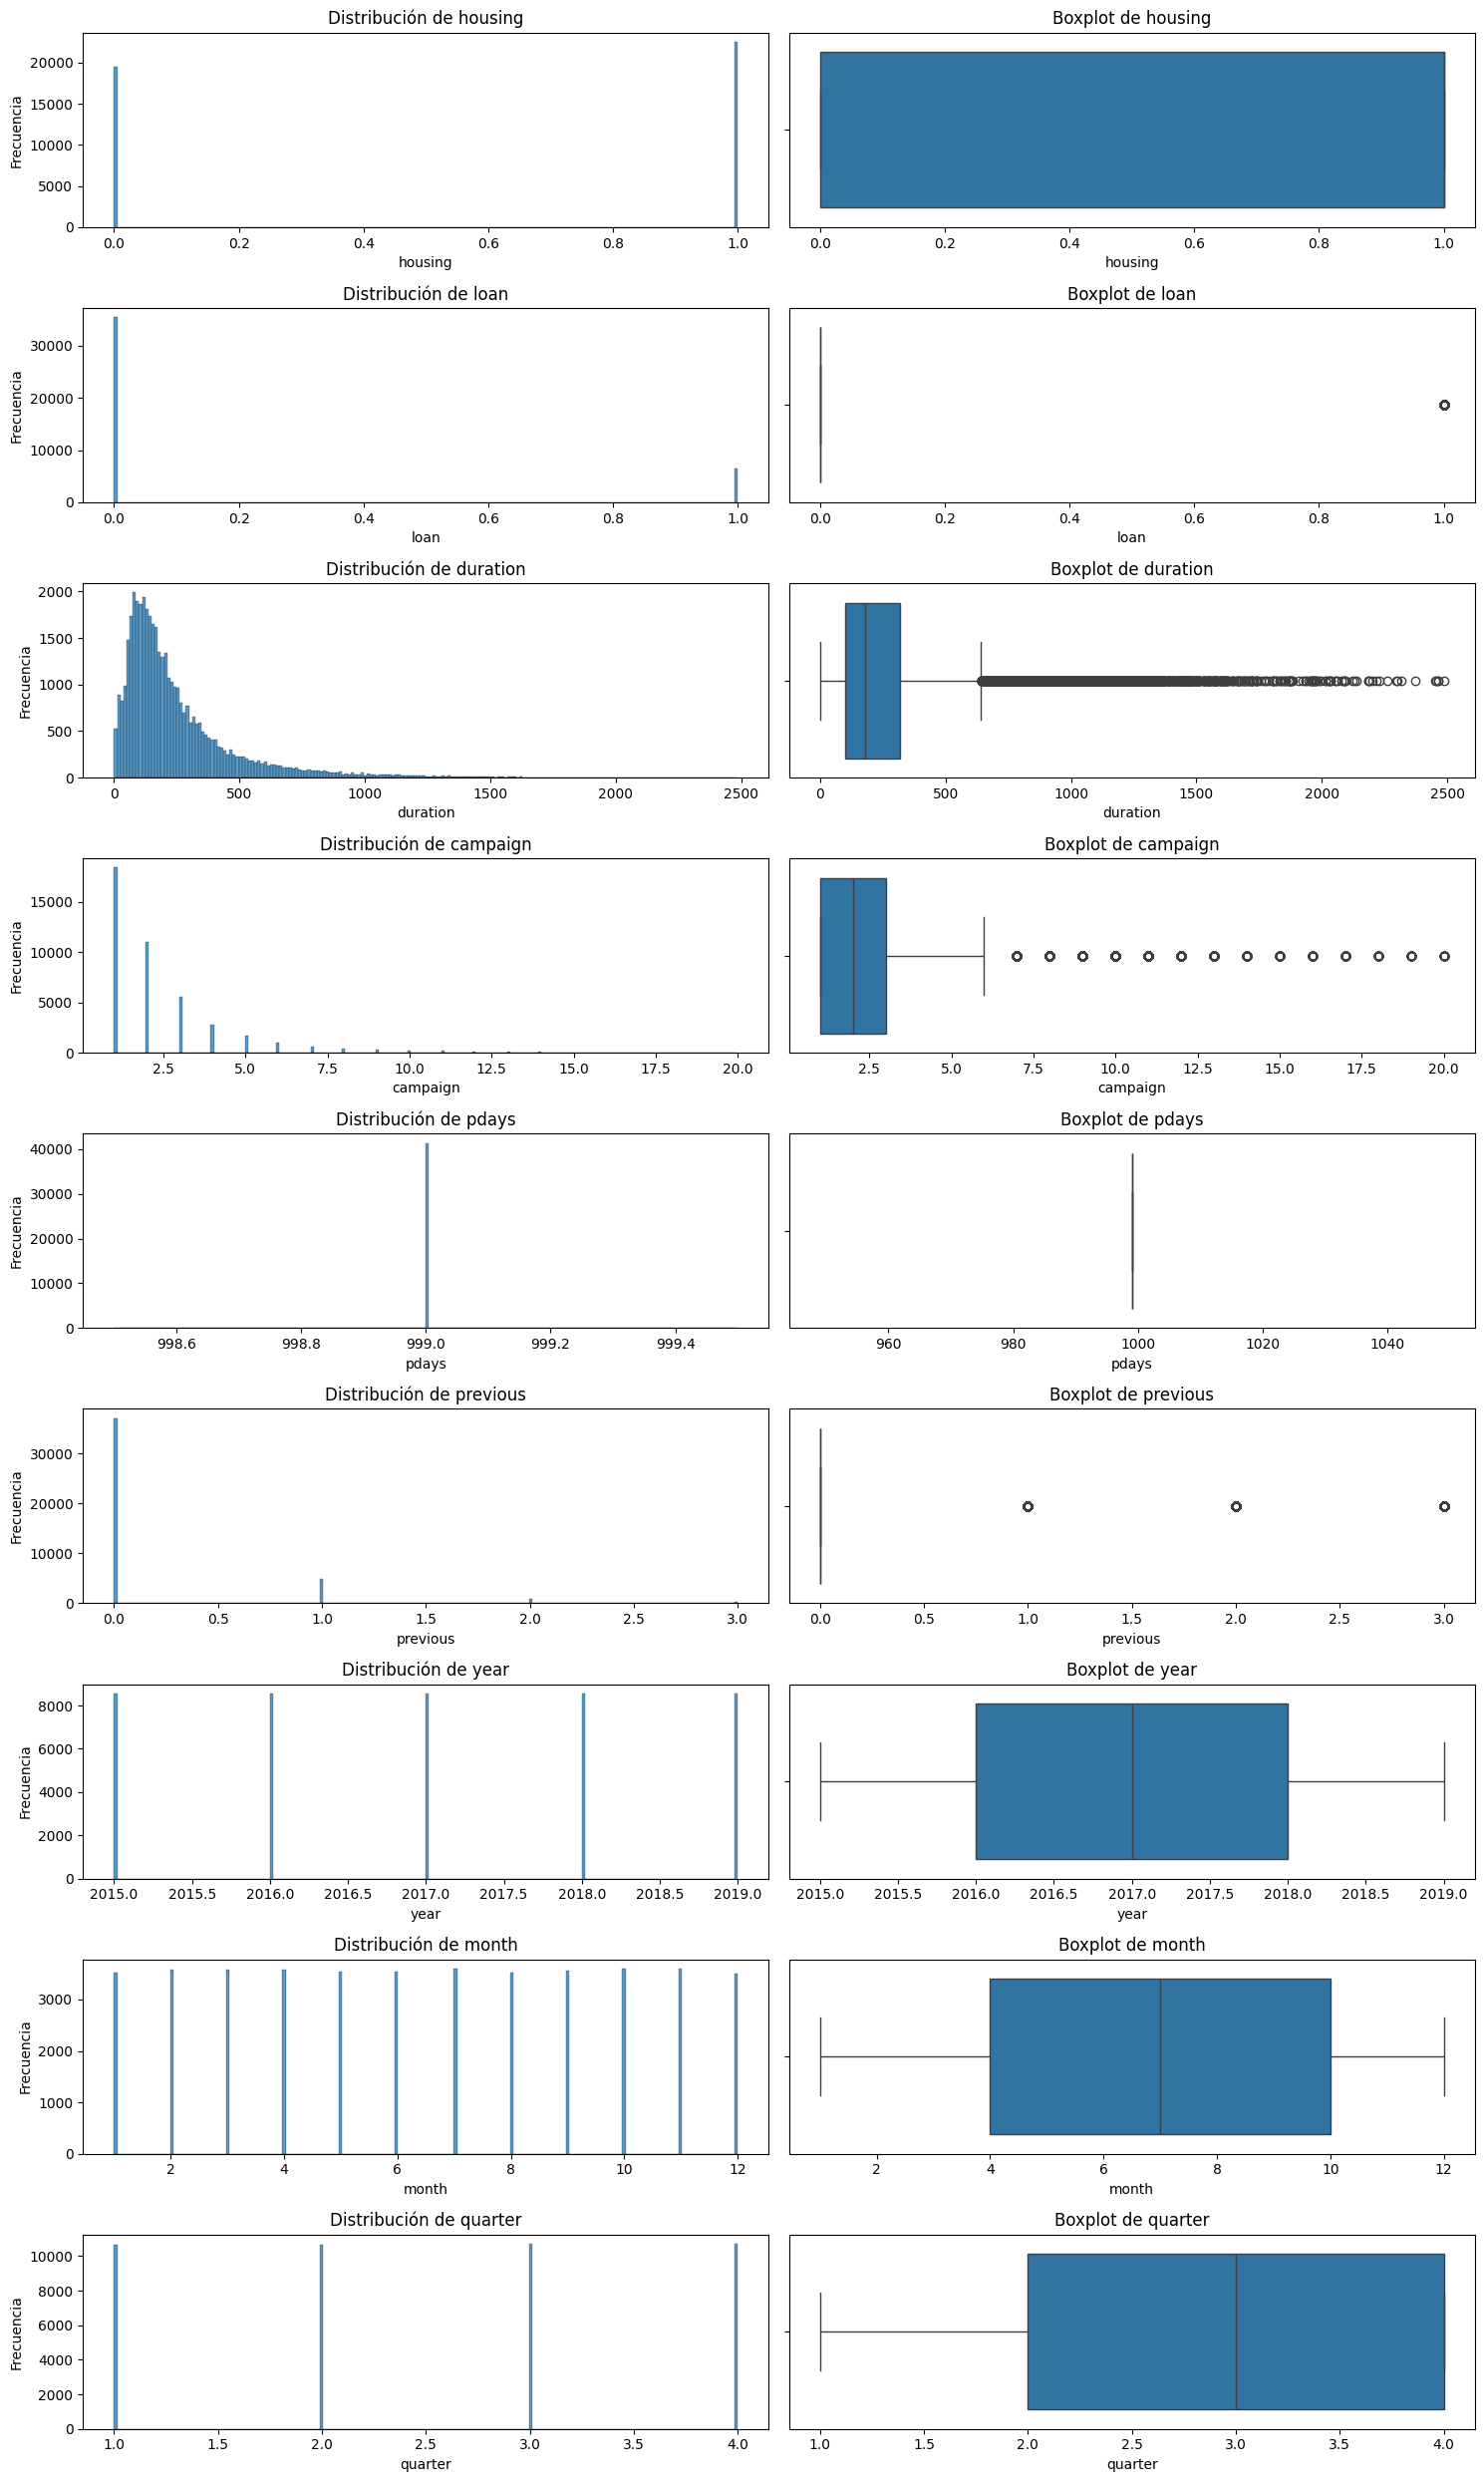

In [19]:
# Recordamos distribución y estadísticos de las columnas por debajo del umbral
sv.subplot_col_num(df, col_low_umbral)

In [20]:
# Recordamos los estadísticos de estas columnas
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
housing,41974.0000,0.5360,0.4987,0.0000,0.0000,1.0000,1.0000,1.0000
loan,41974.0000,0.1556,0.3625,0.0000,0.0000,0.0000,0.0000,1.0000
duration,42975.0000,255.9945,247.9282,0.0000,102.0000,179.0000,318.0000,2486.0000
campaign,42830.0000,2.4714,2.2953,1.0000,1.0000,2.0000,3.0000,20.0000
pdays,41412.0000,999.0000,0.0000,999.0000,999.0000,999.0000,999.0000,999.0000
previous,42899.0000,0.1642,0.4543,0.0000,0.0000,0.0000,0.0000,3.0000
year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000
quarter,42752.0000,2.5013,1.1185,1.0000,2.0000,3.0000,4.0000,4.0000


In [21]:
df_filled_simple = df.fillna({
    "housing": df["housing"].median(),
    "loan": df["loan"].median(),
    "duration": df["duration"].mean(),
    "campaign": df["campaign"].mean(),
    "pdays": df["pdays"].mean(),
    "previous": df["previous"].median(),
    "year": 2017,
    "month": df["month"].median(),
    "quarter": 3,
})
df_filled_simple.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,latitude,longitude,id_,date_dt,year,month,day,quarter
0,NaN,housemaid,married,basic.4y,0.0000,0.0000,0.0000,telephone,261.0000,1.0000,999.0000,0.0000,nonexistent,"1,1","93,994","-36,4","4,857",5191,no,"41,495","-71,233",089b39d8-e4d0-461b-87d4-814d71e0e079,2019-08-02,2019.0000,8.0000,friday,3.0000
1,57.0000,services,married,high.school,NaN,0.0000,0.0000,telephone,149.0000,1.0000,999.0000,0.0000,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"34,601","-83,923",e9d37224-cb6f-4942-98d7-46672963d097,2016-09-14,2016.0000,9.0000,wednesday,3.0000
2,37.0000,services,married,high.school,0.0000,1.0000,0.0000,telephone,226.0000,1.0000,999.0000,0.0000,nonexistent,"1,1","93,994","-36,4","4,857",5191,no,"34,939","-94,847",3f9f49b5-e410-4948-bf6e-f9244f04918b,2019-02-15,2019.0000,2.0000,friday,1.0000
3,40.0000,admin.,married,basic.6y,0.0000,0.0000,0.0000,telephone,151.0000,1.0000,999.0000,0.0000,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"49,041","-70,308",9991fafb-4447-451a-8be2-b0df6098d13e,2015-11-29,2015.0000,11.0000,sunday,4.0000
4,56.0000,services,married,high.school,0.0000,0.0000,1.0000,telephone,307.0000,1.0000,999.0000,0.0000,nonexistent,"1,1","93,994","-36,4",unknown,5191,no,"38,033","-104,463",eca60b76-70b6-4077-80ba-bc52e8ebb0eb,2017-01-29,2017.0000,1.0000,sunday,1.0000


In [22]:
snulos.calcular_solo_col_nul(df_filled_simple[col_low_umbral])

,Column,DataType,NullCount,Null%


([], [])

In [ ]:
# Comprobar como cambian mis estadísticos al rellenar los nulos
# Describe del dataframe nuevo
df_filled_simple[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
housing,43000.0000,0.5471,0.4978,0.0000,0.0000,1.0000,1.0000,1.0000
loan,43000.0000,0.1519,0.3589,0.0000,0.0000,0.0000,0.0000,1.0000
duration,43000.0000,255.9945,247.8561,0.0000,102.0000,179.0000,318.0000,2486.0000
campaign,43000.0000,2.4714,2.2908,1.0000,1.0000,2.0000,3.0000,20.0000
pdays,43000.0000,999.0000,0.0000,999.0000,999.0000,999.0000,999.0000,999.0000
previous,43000.0000,0.1639,0.4538,0.0000,0.0000,0.0000,0.0000,3.0000
year,43000.0000,2017.0013,1.4102,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,43000.0000,6.5049,3.4390,1.0000,4.0000,7.0000,9.0000,12.0000
quarter,43000.0000,2.5042,1.1159,1.0000,2.0000,3.0000,3.0000,4.0000


In [24]:
# Describe del df con el que trabajo 
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
housing,41974.0000,0.5360,0.4987,0.0000,0.0000,1.0000,1.0000,1.0000
loan,41974.0000,0.1556,0.3625,0.0000,0.0000,0.0000,0.0000,1.0000
duration,42975.0000,255.9945,247.9282,0.0000,102.0000,179.0000,318.0000,2486.0000
campaign,42830.0000,2.4714,2.2953,1.0000,1.0000,2.0000,3.0000,20.0000
pdays,41412.0000,999.0000,0.0000,999.0000,999.0000,999.0000,999.0000,999.0000
previous,42899.0000,0.1642,0.4543,0.0000,0.0000,0.0000,0.0000,3.0000
year,42752.0000,2017.0013,1.4143,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,42752.0000,6.5021,3.4487,1.0000,4.0000,7.0000,10.0000,12.0000
quarter,42752.0000,2.5013,1.1185,1.0000,2.0000,3.0000,4.0000,4.0000


Comprobamos cambios mínimos en los estadísticos. Procedemos a gestionar los nulos de nuestro df, con el que estamos trabajando, como hemos hecho en el df_filled_simple

In [25]:
df = df.fillna({
    "housing": df["housing"].median(),
    "loan": df["loan"].median(),
    "duration": df["duration"].mean(),
    "campaign": df["campaign"].mean(),
    "pdays": df["pdays"].mean(),
    "previous": df["previous"].median(),
    "year": 2017,
    "month": df["month"].median(),
    "quarter": 3,
})
df[col_low_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
housing,43000.0000,0.5471,0.4978,0.0000,0.0000,1.0000,1.0000,1.0000
loan,43000.0000,0.1519,0.3589,0.0000,0.0000,0.0000,0.0000,1.0000
duration,43000.0000,255.9945,247.8561,0.0000,102.0000,179.0000,318.0000,2486.0000
campaign,43000.0000,2.4714,2.2908,1.0000,1.0000,2.0000,3.0000,20.0000
pdays,43000.0000,999.0000,0.0000,999.0000,999.0000,999.0000,999.0000,999.0000
previous,43000.0000,0.1639,0.4538,0.0000,0.0000,0.0000,0.0000,3.0000
year,43000.0000,2017.0013,1.4102,2015.0000,2016.0000,2017.0000,2018.0000,2019.0000
month,43000.0000,6.5049,3.4390,1.0000,4.0000,7.0000,9.0000,12.0000
quarter,43000.0000,2.5042,1.1159,1.0000,2.0000,3.0000,3.0000,4.0000


## Empezamos a gestionar nulos: columnas con un % de nulos superior al umbral
- El umbral estabelcido es 10%
- El método para imputar nulos va a ser iterativeimputer

In [26]:
iter_imputer = IterativeImputer(max_iter=50, 
                                random_state=42)
data_imputed = iter_imputer.fit_transform(df[col_high_umbral])
type(data_imputed)


numpy.ndarray

In [27]:
df[col_high_umbral].describe().T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
default,34016.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [28]:
def imputar_iterative(dataframe, lista_columnas):
    iter_imputer = IterativeImputer(max_iter=50, 
                                random_state=42)
    data_imputed = iter_imputer.fit_transform(df[col_high_umbral])
    new_col = [col + "_iterative" for col in lista_columnas]
    dataframe[new_col] = data_imputed
    display(dataframe[new_col].describe().T)
    return dataframe, new_col

In [29]:
df, col_iterative = imputar_iterative(df, col_high_umbral)


,count,mean,std,min,25%,50%,75%,max
age_iterative,43000.0000,39.9771,9.7968,17.0000,33.0000,39.9771,46.0000,98.0000
default_iterative,43000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Analizamos los resultados de las columnas originales y las creadas con el iterative

In [30]:
# Creamos una lista con las columnas originales y las imputadas
col_imputadas = col_high_umbral + col_iterative

In [31]:
# Comparamos los estadísticos de las nuevas columnas con las originales
df[col_imputadas].describe().sort_index(axis=1).T

,count,mean,std,min,25%,50%,75%,max
age,37880.0000,39.9771,10.4380,17.0000,32.0000,38.0000,47.0000,98.0000
age_iterative,43000.0000,39.9771,9.7968,17.0000,33.0000,39.9771,46.0000,98.0000
default,34016.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
default_iterative,43000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [32]:
# Después de comprobar los estadísticos eliminamos las columnas con nulos
df.drop(columns = col_high_umbral, inplace=True)

In [33]:
# Guardar los avances 
df.to_csv('../data/data_limpios.csv', index=False)